# Making Cool Visualizations from Images



## Imports


Pandas is an all-purpose package for working with tables. 

Plotly is my favorite chart-builder for python. However, MatplotLib and Seaborn can do the exact same things! It is here to preview our data before we bring it into Tableau. 

PIL (Python Image Library, otherwise known as Pillow) allows us to manipulate images.

NumPy is for math. 

In [2]:
import pandas as pd
import plotly.express as px
from PIL import Image
import numpy as np

# Loading our Image

We'll start by using PIL to display our image, just to confirm that we have the right PNG. 

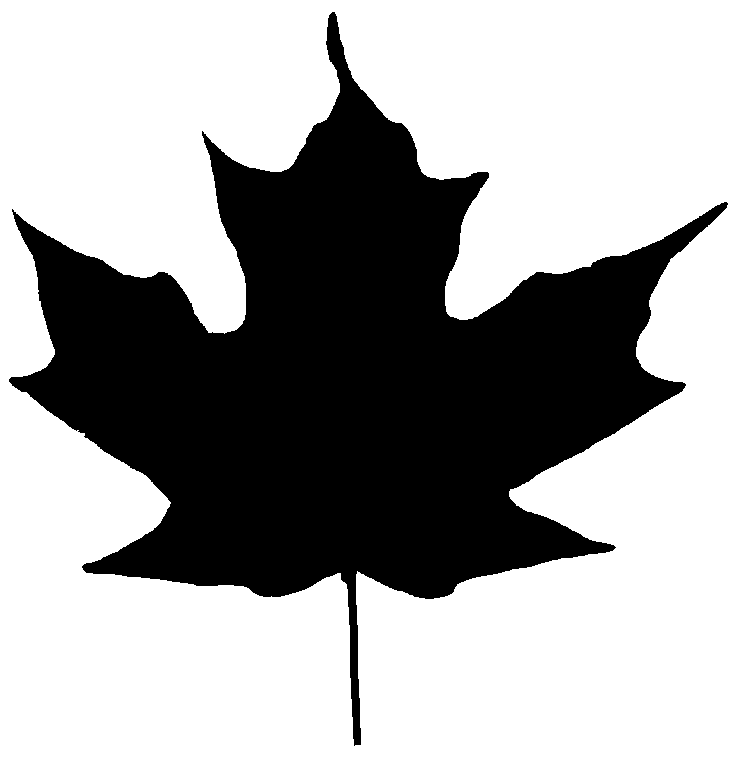

In [3]:
im = Image.open(r"images\SugarMapleLeaf.png") 
 
display(im)

With our image loaded, we can easily access the height and width of the image.

In [15]:
im.height
im.width

750

In [ ]:
def image_to_point_cloud(image_path: str, num_points: int):
    """
    Converts a black-and-white image to a 2D point cloud with a given number of points.

    Returns:
        pd.DataFrame: DataFrame with 'x' and 'y' coordinates of sampled points.
    """
    img = Image.open(image_path)
    #grad witdth and height of
    width, height = img.size
    img_array = np.asarray(img)

    # generate coordinate grid
    y_coords, x_coords = np.indices((height, width))
    flat_x = x_coords.flatten()
    flat_y = y_coords.flatten()
    flat_intensity = img_array.flatten()

    # invert brightness for sampling probability (darker = higher weight)
    probabilities = 255 - flat_intensity
    probabilities = probabilities / probabilities.sum()

    # sample points based on brightness-weighted probabilities
    indices = np.random.choice(
        len(flat_x), size=num_points, replace=False, p=probabilities
    )

    # Create dataFrame of points
    df = pd.DataFrame({
        'x': flat_x[indices],
        'y': height - flat_y[indices]  # flip y-axis for correct orientation
    })

    return df

def plot_point_cloud(df: pd.DataFrame):
    fig = px.scatter(df, x='x', y='y', width=800, height=800)
    fig.update_traces(marker=dict(size=2))
    fig.update_layout(yaxis=dict(scaleanchor="x", scaleratio=1))
    fig.show()

In [7]:
df = image_to_point_cloud("images\SugarMapleLeaf.png", num_points=1000)
plot_point_cloud(df)

<>:1: SyntaxWarning:

invalid escape sequence '\S'

<>:1: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\Miles\AppData\Local\Temp\ipykernel_25472\3537565883.py:1: SyntaxWarning:

invalid escape sequence '\S'



In [ ]:
fig = px.scatter(
        df,
        x='x',
        y='y',
        width=800,
        height=800
    )
    
    fig.update_traces(marker=dict(
        size=10,         # Large points
        color='orange'   # Orange color
    ))
    
    fig.update_layout(
        yaxis=dict(
            scaleanchor="x",
            scaleratio=1,
            showgrid=False   # Remove y-axis grid lines
        ),
        xaxis=dict(
            showgrid=False   # Remove x-axis grid lines
        ),
        plot_bgcolor='white',   # White plot background
        paper_bgcolor='white'   # White paper background
    )
    
    fig.show()